<a href="https://colab.research.google.com/github/taareek/machine_learning/blob/main/shifting_and_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# getting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img_path = '/content/drive/MyDrive/Colab Notebooks/ML/camera.jpg'

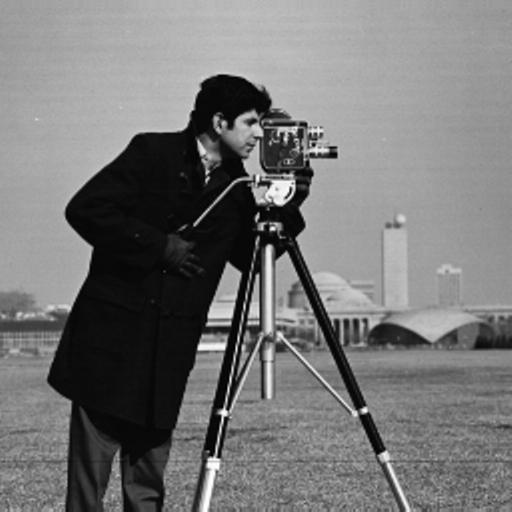

In [4]:
from google.colab.patches import cv2_imshow
img= cv2.imread(img_path, 0)
cv2_imshow(img) 

In [5]:
# Path to save images
dest = '/content/drive/MyDrive/Colab Notebooks/ML/'

In [6]:
# Fuction for avereging filter

def avg_filtering(img):
  m, n = img.shape
  # Averaging filter
  mask = np.ones([3,3], dtype = int)
  mask = mask / 9

  #Convolve the 3*3 mask over the image 
  img_new = np.zeros([m,n])

  for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
        
        img_new[i, j]= temp
         
  img_new = img_new.astype(np.uint8)
  return img_new
  

(512, 512)


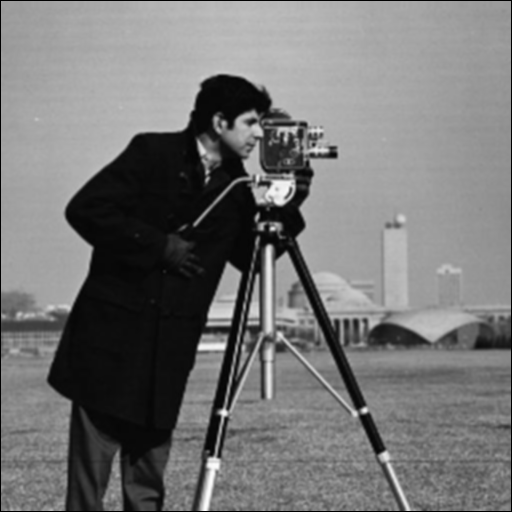

In [13]:
# applying averaging filter to our high resolution image

smooth_img = avg_filtering(img)
print(smooth_img.shape)
cv2.imwrite(dest+'average_filtered.png', smooth_img)
cv2_imshow(smooth_img)

In [14]:
# Function subsample image 

def subsample(img, factor, start_index):
  sub_img = np.zeros(((img.shape[0]//factor)+1, (img.shape[1]//factor)+1))
  for i in range(start_index, (img.shape[0]//factor)+1):
    for j in range(start_index,(img.shape[1]//factor)+1):
      sub_img[i,j] = img[i* factor, j* factor]
  
  return sub_img


(171, 171)
(171, 171)
(171, 171)
(171, 171)
(171, 171)
(171, 171)
(171, 171)
(171, 171)
(171, 171)


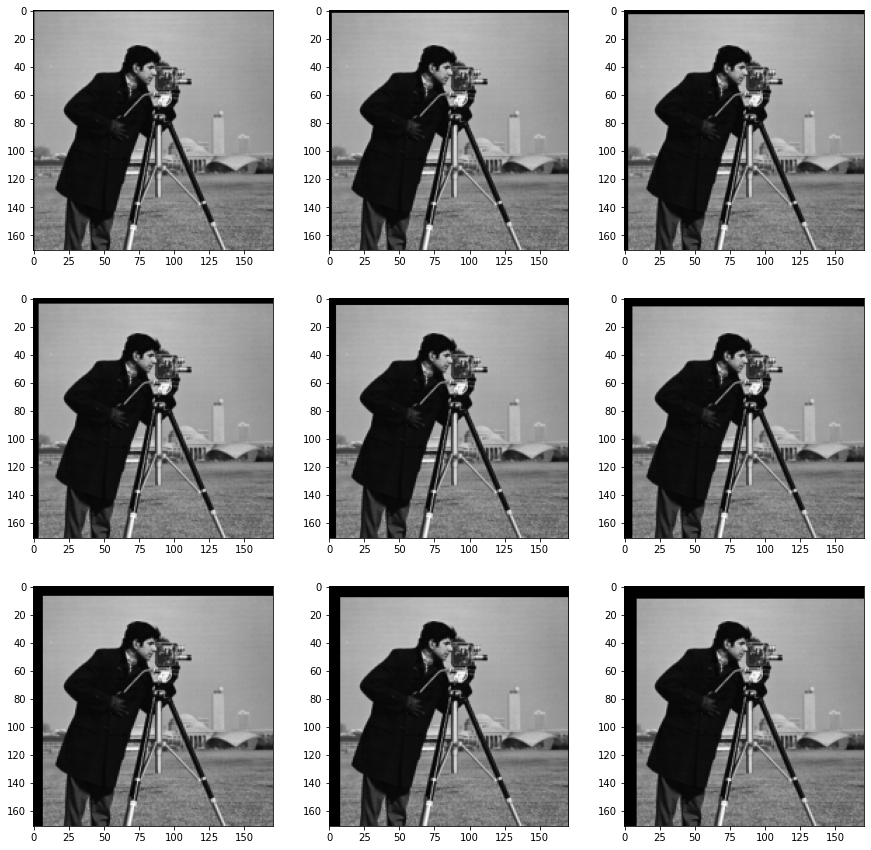

In [15]:
# Making 9 subsample images 
# 
fig = plt.figure(figsize=(15, 15))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    # getting subsampled image
    img = subsample(smooth_img, 3, i)
    # save that image to device
    cv2.imwrite(dest+ 'subsample_'+ str(i)+ '.png', img)
    #printing shape of subsampled image
    print(img.shape)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap= 'gray')
plt.show()

In [17]:
# Shifting image
# x_shift: horizontal shift
#y_shift: vertical shift

def shift_image(img, x_shift, y_shift):
  rows, cols = img.shape
  matrix = np.float32([[1,0,x_shift], [0,1,y_shift]])
  shifted_img = cv2.warpAffine(img, matrix, (cols, rows))
  return shifted_img

In [18]:
path = '/content/drive/MyDrive/Colab Notebooks/ML/'

In [25]:
# shifting image 
s_img = path+ 'subsample_1.png'
s_img = cv2.imread(s_img, 0)
s_img.shape

(171, 171)

In [26]:
s1_img = shift_image(s_img, 10, -2)

In [27]:
s1_img.shape

(171, 171)

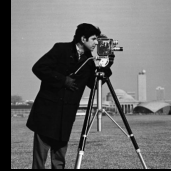

In [28]:
cv2_imshow(s1_img)

In [29]:
# Getting correlation
def get_correlation(original_img, shifted_img):
  rows, cols = original_img.shape
  cor_matrix = np.zeros((rows, cols))
  for i in range(0, rows):
    for j in range(0, cols):
      cor_matrix[i,j] = np.sum(np.multiply(original_img[i,j], shifted_img[i, j]))
  
  #return cor_matrix
  indices = np.where(cor_matrix == cor_matrix.max())
  max_value = cor_matrix[indices]
  indexes = np.argwhere(cor_matrix == cor_matrix.max())
  return max_value, indexes


In [31]:
# Getting maximum correlation and index value for our first subsample image and shifted of first subsampled image
value, index = get_correlation(s_img, s1_img)
print('Maximum Correlation Value: ', value)
print("Index of Maximum correlation value: \n", index)

Maximum Correlation Value:  [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255.]
Index of Maximum correlation value: 
 [[  3  21]
 [  4  20]
 [  6  17]
 [  8  58]
 [ 11  19]
 [ 11  50]
 [ 11  52]
 [ 11  54]
 [ 12  47]
 [ 12  51]
 [ 12 110]
 [ 12 114]
 [ 12 115]
 [ 15 154]
 [ 16  19]
 [ 16  58]
 [ 19  60]
 [ 19  62]
 [ 20  16]
 [ 20  55]
 [ 20  61]
 [ 20 119]
 [ 21  53]
 [ 22  42]
 [ 24 154]
 [ 25  12]
 [ 25  51]
 [ 26 110]
 [ 28  12]
 [ 28  42]
 [ 29  50]
 [ 29 153]
 [ 30 1

In [32]:
print(len(value))

113
